# Train Journeys Exploration And Analysis in Spain
## By Sebastian Romero

### Goal of the analysis

In this analysis, we'll be working with a dataset that contains comprehensive information about train journeys in Spain, collected over a one year period (2019). Our dataset includes information about the origin and destination cities, the type of train, the fare type, the class of travel, the ticket price, and the timing of each journey.

We will be performing a variety of exploratory data analyses and visualization tasks to identify trends, correlations, and other insightful patterns.

**Disclaimer:** This is a dummy dataset and do not represent the reality of the train journeys in Spain.

### First we change the layout of the Jupyter Notebook

In [1]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

### If db is open from Google  Drive we import `google.colab.drive`

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Import all the necessary libraries to explore the data

In [2]:
#importamos librería
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder,MinMaxScaler

import folium
import plotly.express as px

### Let's read the csv file from the drive

In [4]:
df_renfe = pd.read_csv("/content/drive/MyDrive/DATA SCIENCE/Clase1y2-Preprocessing/Clase1y2-Preprocessing/Project TrenMax/Project TrenMax/dataset/renfe.csv",index_col=0)

### Now to start we want to check the columns, types, memory usage and the total data we will be exploring

In [5]:
df_renfe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 383568 entries, 0 to 383567
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   FECHA_CONSULTA  383568 non-null  object 
 1   FECHA_INICIO    383568 non-null  object 
 2   FECHA_FIN       383568 non-null  object 
 3   CIUDAD_ORIGEN   383568 non-null  object 
 4   CIUDAD_DESTINO  383568 non-null  object 
 5   TIPO_TREN       345211 non-null  object 
 6   TIPO_TARIFA     344009 non-null  object 
 7   CLASE           344000 non-null  object 
 8   PRECIO          355038 non-null  float64
dtypes: float64(1), object(8)
memory usage: 29.3+ MB


### This is a sample of the data, we will be working with train routes, duration of the journey, prices and ticket classes

In [6]:
df_renfe.head()

,FECHA_CONSULTA,FECHA_INICIO,FECHA_FIN,CIUDAD_ORIGEN,CIUDAD_DESTINO,TIPO_TREN,TIPO_TARIFA,CLASE,PRECIO
0,2019-05-25 01:43:03,2019-06-28 20:36:00,2019-06-28 23:14:00,SEVILLA,MADRID,ALVIA,Flexible,Turista,67.20
1,2019-06-22 13:05:11,2019-07-14 10:00:00,2019-07-14 13:10:00,BARCELONA,MADRID,AVE,Flexible,Turista,107.70
2,2019-04-17 06:24:03,2019-05-23 13:40:00,2019-05-23 16:10:00,SEVILLA,MADRID,AVE,Promo,Turista,47.30
3,2019-05-10 21:21:59,2019-05-29 14:50:00,2019-05-29 22:30:00,VALENCIA,MADRID,REGIONAL,Adulto ida,Turista,28.35
4,2019-05-09 19:43:37,2019-06-26 13:25:00,2019-06-26 16:24:00,MADRID,BARCELONA,AVE-TGV,Promo,Turista,66.75


In [7]:
#PREGUNTA 1   R/ TIPO_TREN;TIPO_TARIFA;CLASE;PRECIO SERIAN LAS VARIABLES CON NULOS

In [8]:
df_renfe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 383568 entries, 0 to 383567
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   FECHA_CONSULTA  383568 non-null  object 
 1   FECHA_INICIO    383568 non-null  object 
 2   FECHA_FIN       383568 non-null  object 
 3   CIUDAD_ORIGEN   383568 non-null  object 
 4   CIUDAD_DESTINO  383568 non-null  object 
 5   TIPO_TREN       345211 non-null  object 
 6   TIPO_TARIFA     344009 non-null  object 
 7   CLASE           344000 non-null  object 
 8   PRECIO          355038 non-null  float64
dtypes: float64(1), object(8)
memory usage: 29.3+ MB


In [9]:
df_renfe.isnull().sum()

FECHA_CONSULTA        0
FECHA_INICIO          0
FECHA_FIN             0
CIUDAD_ORIGEN         0
CIUDAD_DESTINO        0
TIPO_TREN         38357
TIPO_TARIFA       39559
CLASE             39568
PRECIO            28530
dtype: int64

In [10]:
#PREGUNTA 2

In [11]:
df_renfe1= df_renfe.copy()

In [12]:
lista_fechas = ["FECHA_CONSULTA","FECHA_INICIO","FECHA_FIN"]

In [13]:
for i in lista_fechas:
  df_renfe1[i]=pd.to_datetime(df_renfe1[i])

In [14]:
df_renfe1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 383568 entries, 0 to 383567
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   FECHA_CONSULTA  383568 non-null  datetime64[ns]
 1   FECHA_INICIO    383568 non-null  datetime64[ns]
 2   FECHA_FIN       383568 non-null  datetime64[ns]
 3   CIUDAD_ORIGEN   383568 non-null  object        
 4   CIUDAD_DESTINO  383568 non-null  object        
 5   TIPO_TREN       345211 non-null  object        
 6   TIPO_TARIFA     344009 non-null  object        
 7   CLASE           344000 non-null  object        
 8   PRECIO          355038 non-null  float64       
dtypes: datetime64[ns](3), float64(1), object(5)
memory usage: 29.3+ MB


In [15]:
#PREGUNTA 3

In [16]:
len( df_renfe1)

383568

In [17]:
df_renfe1[df_renfe1.duplicated()]

,FECHA_CONSULTA,FECHA_INICIO,FECHA_FIN,CIUDAD_ORIGEN,CIUDAD_DESTINO,TIPO_TREN,TIPO_TARIFA,CLASE,PRECIO
67494,2019-04-29 23:15:13,2019-05-14 06:20:00,2019-05-14 14:25:00,MADRID,BARCELONA,LD-AVE,Promo,Turista,NaN
82429,2019-04-30 09:09:51,2019-05-19 17:30:00,2019-05-19 19:43:00,VALENCIA,MADRID,INTERCITY,Flexible,Turista,55.40
88401,2019-05-15 23:37:01,2019-06-21 21:05:00,2019-06-21 23:32:00,VALENCIA,MADRID,INTERCITY,NaN,NaN,NaN
107458,2019-06-12 11:51:44,2019-06-16 17:30:00,2019-06-16 19:43:00,VALENCIA,MADRID,INTERCITY,Flexible,TuristaSólo plaza H,55.40
143395,2019-08-17 03:22:19,2019-09-01 21:03:00,2019-09-01 23:28:00,VALENCIA,MADRID,INTERCITY,Flexible,Turista,NaN
159167,2019-05-16 13:12:07,2019-06-29 21:05:00,2019-06-29 23:32:00,VALENCIA,MADRID,INTERCITY,NaN,NaN,NaN
170659,2019-05-15 21:26:30,2019-06-23 21:05:00,2019-06-23 23:32:00,VALENCIA,MADRID,INTERCITY,NaN,NaN,NaN
191339,2019-08-18 17:34:03,2019-08-23 21:03:00,2019-08-23 23:28:00,VALENCIA,MADRID,INTERCITY,Flexible,Turista,55.40
235466,2019-06-18 23:16:29,2019-07-23 07:00:00,2019-07-23 14:25:00,MADRID,BARCELONA,LD-AVE,Promo,Turista Plus,NaN
241656,2019-05-14 03:01:42,2019-07-07 21:05:00,2019-07-07 23:32:00,VALENCIA,MADRID,INTERCITY,Promo,Turista,NaN


In [18]:
len(df_renfe1[df_renfe1.duplicated()])

24

In [19]:
df_renfe2= df_renfe1.copy()

In [20]:
df_renfe2.drop_duplicates(inplace=True)

In [21]:
df_renfe2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 383544 entries, 0 to 383567
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   FECHA_CONSULTA  383544 non-null  datetime64[ns]
 1   FECHA_INICIO    383544 non-null  datetime64[ns]
 2   FECHA_FIN       383544 non-null  datetime64[ns]
 3   CIUDAD_ORIGEN   383544 non-null  object        
 4   CIUDAD_DESTINO  383544 non-null  object        
 5   TIPO_TREN       345187 non-null  object        
 6   TIPO_TARIFA     343990 non-null  object        
 7   CLASE           343981 non-null  object        
 8   PRECIO          355028 non-null  float64       
dtypes: datetime64[ns](3), float64(1), object(5)
memory usage: 29.3+ MB


In [22]:
len(df_renfe2[df_renfe2.duplicated()])

0

In [23]:
#PREGUNTA 4

In [24]:
# a) Tiempo_Viaje: variable que me indica en minutos la duración del viaje

In [25]:
df_renfe2["Tiempo_Viaje"]= (df_renfe2["FECHA_FIN"]- df_renfe2["FECHA_INICIO"]) / np.timedelta64(1,"m")

In [26]:
df_renfe2.head()

,FECHA_CONSULTA,FECHA_INICIO,FECHA_FIN,CIUDAD_ORIGEN,CIUDAD_DESTINO,TIPO_TREN,TIPO_TARIFA,CLASE,PRECIO,Tiempo_Viaje
0,2019-05-25 01:43:03,2019-06-28 20:36:00,2019-06-28 23:14:00,SEVILLA,MADRID,ALVIA,Flexible,Turista,67.20,158.0
1,2019-06-22 13:05:11,2019-07-14 10:00:00,2019-07-14 13:10:00,BARCELONA,MADRID,AVE,Flexible,Turista,107.70,190.0
2,2019-04-17 06:24:03,2019-05-23 13:40:00,2019-05-23 16:10:00,SEVILLA,MADRID,AVE,Promo,Turista,47.30,150.0
3,2019-05-10 21:21:59,2019-05-29 14:50:00,2019-05-29 22:30:00,VALENCIA,MADRID,REGIONAL,Adulto ida,Turista,28.35,460.0
4,2019-05-09 19:43:37,2019-06-26 13:25:00,2019-06-26 16:24:00,MADRID,BARCELONA,AVE-TGV,Promo,Turista,66.75,179.0


In [27]:
# b) Dif_Ini_Bus: variable que me indica en minutos la diferencia entre la fecha de inicio de viaje y la fecha de búsqueda

In [28]:
df_renfe2["Dif_Ini_Bus"]= (df_renfe2["FECHA_INICIO"]- df_renfe2["FECHA_CONSULTA"]) / np.timedelta64(1,"m")

In [29]:
df_renfe2.head()

,FECHA_CONSULTA,FECHA_INICIO,FECHA_FIN,CIUDAD_ORIGEN,CIUDAD_DESTINO,TIPO_TREN,TIPO_TARIFA,CLASE,PRECIO,Tiempo_Viaje,Dif_Ini_Bus
0,2019-05-25 01:43:03,2019-06-28 20:36:00,2019-06-28 23:14:00,SEVILLA,MADRID,ALVIA,Flexible,Turista,67.20,158.0,50092.950000
1,2019-06-22 13:05:11,2019-07-14 10:00:00,2019-07-14 13:10:00,BARCELONA,MADRID,AVE,Flexible,Turista,107.70,190.0,31494.816667
2,2019-04-17 06:24:03,2019-05-23 13:40:00,2019-05-23 16:10:00,SEVILLA,MADRID,AVE,Promo,Turista,47.30,150.0,52275.950000
3,2019-05-10 21:21:59,2019-05-29 14:50:00,2019-05-29 22:30:00,VALENCIA,MADRID,REGIONAL,Adulto ida,Turista,28.35,460.0,26968.016667
4,2019-05-09 19:43:37,2019-06-26 13:25:00,2019-06-26 16:24:00,MADRID,BARCELONA,AVE-TGV,Promo,Turista,66.75,179.0,68741.383333


In [30]:
#PREGUNTA 5

In [31]:
df_renfe3= df_renfe2.copy()

In [32]:
for col in ['FECHA_CONSULTA', 'FECHA_INICIO', 'FECHA_FIN']:
    df_renfe3[col + '_HORA'] = df_renfe3[col].dt.hour
    df_renfe3[col + '_NOMBREDIA'] = df_renfe3[col].dt.day_name()
    df_renfe3[col + '_DIA'] = df_renfe3[col].dt.day
    df_renfe3[col + '_MES'] = df_renfe3[col].dt.month
    df_renfe3[col + '_AÑO'] = df_renfe3[col].dt.year


    del df_renfe3[col]

df_renfe3.head()

,CIUDAD_ORIGEN,CIUDAD_DESTINO,TIPO_TREN,TIPO_TARIFA,CLASE,PRECIO,Tiempo_Viaje,Dif_Ini_Bus,FECHA_CONSULTA_HORA,FECHA_CONSULTA_NOMBREDIA,...,FECHA_INICIO_HORA,FECHA_INICIO_NOMBREDIA,FECHA_INICIO_DIA,FECHA_INICIO_MES,FECHA_INICIO_AÑO,FECHA_FIN_HORA,FECHA_FIN_NOMBREDIA,FECHA_FIN_DIA,FECHA_FIN_MES,FECHA_FIN_AÑO
0,SEVILLA,MADRID,ALVIA,Flexible,Turista,67.20,158.0,50092.950000,1,Saturday,...,20,Friday,28,6,2019,23,Friday,28,6,2019
1,BARCELONA,MADRID,AVE,Flexible,Turista,107.70,190.0,31494.816667,13,Saturday,...,10,Sunday,14,7,2019,13,Sunday,14,7,2019
2,SEVILLA,MADRID,AVE,Promo,Turista,47.30,150.0,52275.950000,6,Wednesday,...,13,Thursday,23,5,2019,16,Thursday,23,5,2019
3,VALENCIA,MADRID,REGIONAL,Adulto ida,Turista,28.35,460.0,26968.016667,21,Friday,...,14,Wednesday,29,5,2019,22,Wednesday,29,5,2019
4,MADRID,BARCELONA,AVE-TGV,Promo,Turista,66.75,179.0,68741.383333,19,Thursday,...,13,Wednesday,26,6,2019,16,Wednesday,26,6,2019


In [33]:
#PREGUNTA 6

In [34]:
df_renfe3.isnull().sum()

CIUDAD_ORIGEN                   0
CIUDAD_DESTINO                  0
TIPO_TREN                   38357
TIPO_TARIFA                 39554
CLASE                       39563
PRECIO                      28516
Tiempo_Viaje                    0
Dif_Ini_Bus                     0
FECHA_CONSULTA_HORA             0
FECHA_CONSULTA_NOMBREDIA        0
FECHA_CONSULTA_DIA              0
FECHA_CONSULTA_MES              0
FECHA_CONSULTA_AÑO              0
FECHA_INICIO_HORA               0
FECHA_INICIO_NOMBREDIA          0
FECHA_INICIO_DIA                0
FECHA_INICIO_MES                0
FECHA_INICIO_AÑO                0
FECHA_FIN_HORA                  0
FECHA_FIN_NOMBREDIA             0
FECHA_FIN_DIA                   0
FECHA_FIN_MES                   0
FECHA_FIN_AÑO                   0
dtype: int64

In [35]:
df_renfe3["PRECIO"].isnull().sum()

28516

In [36]:
len(df_renfe3)

383544

In [37]:
(df_renfe3["PRECIO"].isnull().sum() / len(df_renfe3)) *100

7.434870575475043

In [38]:
#PREGUNTA 7

In [39]:
df_renfe3["TIPO_TREN"].value_counts()

AVE          236293
ALVIA         27231
INTERCITY     17827
REGIONAL      16817
AV City        9754
MD-LD          7475
LD             5905
AVE-TGV        4593
R. EXPRES      4165
TRENHOTEL      3956
AVE-LD         3505
AVE-MD         2955
LD-MD          2793
MD-AVE          871
MD              548
LD-AVE          499
Name: TIPO_TREN, dtype: int64

In [40]:
df_renfe3["TIPO_TARIFA"].value_counts()

Promo                      239839
Flexible                    74133
Adulto ida                  21624
Promo +                      8222
COD.PROMOCIONAL               148
Individual-Flexible            11
Mesa                            8
Doble Familiar-Flexible         3
4x100                           1
Grupos Ida                      1
Name: TIPO_TARIFA, dtype: int64

In [41]:
df_renfe3["CLASE"].value_counts()

Turista                     261731
Preferente                   33963
Turista Plus                 24347
Turista con enlace           20866
TuristaSólo plaza H           2477
PreferenteSólo plaza H         317
Cama Turista                   263
Cama G. Clase                   15
Turista PlusSólo plaza H         2
Name: CLASE, dtype: int64

In [42]:
df_renfe4= df_renfe3.copy()

In [43]:
df_renfe4.dropna(subset=["PRECIO"], inplace=True)

In [44]:
df_renfe4.isnull().sum()

CIUDAD_ORIGEN                   0
CIUDAD_DESTINO                  0
TIPO_TREN                   35443
TIPO_TARIFA                 35453
CLASE                       35554
PRECIO                          0
Tiempo_Viaje                    0
Dif_Ini_Bus                     0
FECHA_CONSULTA_HORA             0
FECHA_CONSULTA_NOMBREDIA        0
FECHA_CONSULTA_DIA              0
FECHA_CONSULTA_MES              0
FECHA_CONSULTA_AÑO              0
FECHA_INICIO_HORA               0
FECHA_INICIO_NOMBREDIA          0
FECHA_INICIO_DIA                0
FECHA_INICIO_MES                0
FECHA_INICIO_AÑO                0
FECHA_FIN_HORA                  0
FECHA_FIN_NOMBREDIA             0
FECHA_FIN_DIA                   0
FECHA_FIN_MES                   0
FECHA_FIN_AÑO                   0
dtype: int64

In [45]:
len(np.where(df_renfe4["TIPO_TARIFA"].isnull() & df_renfe4["TIPO_TREN"].isnull())[0])

3580

In [46]:
len(np.where(df_renfe4["CLASE"].isnull() & df_renfe4["TIPO_TREN"].isnull())[0])

3573

In [47]:
len(np.where(df_renfe4["TIPO_TARIFA"].isnull() & df_renfe4["CLASE"].isnull())[0])

3677

In [48]:
len(np.where(df_renfe4["TIPO_TARIFA"].isnull() & df_renfe4["TIPO_TREN"].isnull() & df_renfe4["CLASE"].isnull())[0])

355

In [49]:
df_renfe4.drop(df_renfe4[df_renfe4["TIPO_TARIFA"].isnull() & df_renfe4["TIPO_TREN"].isnull()].index, inplace=True)

In [50]:
df_renfe4.drop(df_renfe4[df_renfe4["CLASE"].isnull() & df_renfe4["TIPO_TREN"].isnull()].index, inplace=True)

In [51]:
df_renfe4.drop(df_renfe4[df_renfe4["TIPO_TARIFA"].isnull() & df_renfe4["CLASE"].isnull()].index, inplace=True)

In [52]:
df_renfe4.drop(df_renfe4[df_renfe4["TIPO_TARIFA"].isnull() & df_renfe4["TIPO_TREN"].isnull() & df_renfe4["CLASE"].isnull() ].index, inplace=True)

In [53]:
df_renfe4.isnull().sum()

CIUDAD_ORIGEN                   0
CIUDAD_DESTINO                  0
TIPO_TREN                   28645
TIPO_TARIFA                 28551
CLASE                       28659
PRECIO                          0
Tiempo_Viaje                    0
Dif_Ini_Bus                     0
FECHA_CONSULTA_HORA             0
FECHA_CONSULTA_NOMBREDIA        0
FECHA_CONSULTA_DIA              0
FECHA_CONSULTA_MES              0
FECHA_CONSULTA_AÑO              0
FECHA_INICIO_HORA               0
FECHA_INICIO_NOMBREDIA          0
FECHA_INICIO_DIA                0
FECHA_INICIO_MES                0
FECHA_INICIO_AÑO                0
FECHA_FIN_HORA                  0
FECHA_FIN_NOMBREDIA             0
FECHA_FIN_DIA                   0
FECHA_FIN_MES                   0
FECHA_FIN_AÑO                   0
dtype: int64

In [54]:
df_renfe4["TIPO_TREN"].fillna("SIN TIPO",inplace=True)

In [55]:
df_renfe4["TIPO_TARIFA"].fillna("SIN TIPO",inplace=True)

In [56]:
df_renfe4["CLASE"].fillna("SIN CLASE",inplace=True)

In [57]:
df_renfe4.isnull().sum()

CIUDAD_ORIGEN               0
CIUDAD_DESTINO              0
TIPO_TREN                   0
TIPO_TARIFA                 0
CLASE                       0
PRECIO                      0
Tiempo_Viaje                0
Dif_Ini_Bus                 0
FECHA_CONSULTA_HORA         0
FECHA_CONSULTA_NOMBREDIA    0
FECHA_CONSULTA_DIA          0
FECHA_CONSULTA_MES          0
FECHA_CONSULTA_AÑO          0
FECHA_INICIO_HORA           0
FECHA_INICIO_NOMBREDIA      0
FECHA_INICIO_DIA            0
FECHA_INICIO_MES            0
FECHA_INICIO_AÑO            0
FECHA_FIN_HORA              0
FECHA_FIN_NOMBREDIA         0
FECHA_FIN_DIA               0
FECHA_FIN_MES               0
FECHA_FIN_AÑO               0
dtype: int64

In [58]:
#PREGUNTA 8

In [59]:
df_renfe5= df_renfe4.copy()

array([[<Axes: title={'center': 'PRECIO'}>]], dtype=object)

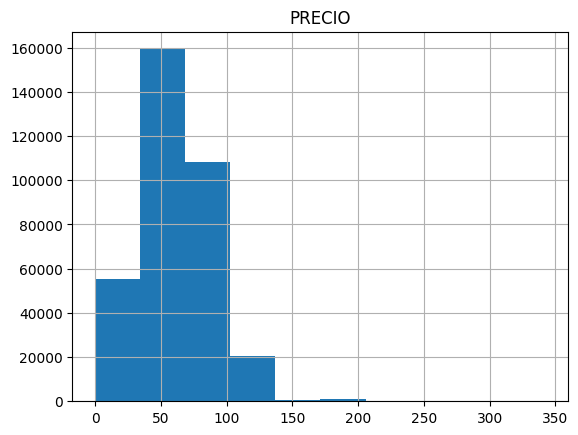

In [60]:
df_renfe5.hist("PRECIO")

array([[<Axes: title={'center': 'Tiempo_Viaje'}>]], dtype=object)

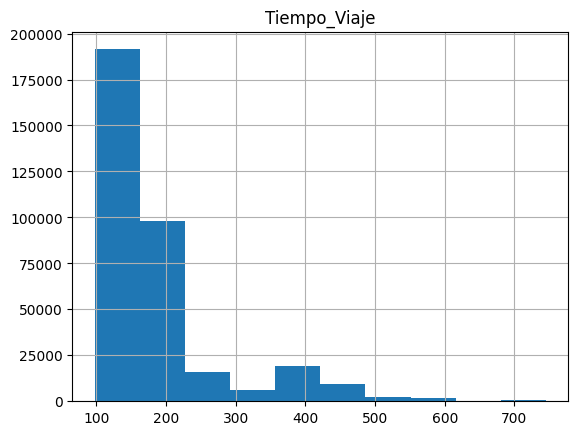

In [61]:
df_renfe5.hist("Tiempo_Viaje")

array([[<Axes: title={'center': 'Dif_Ini_Bus'}>]], dtype=object)

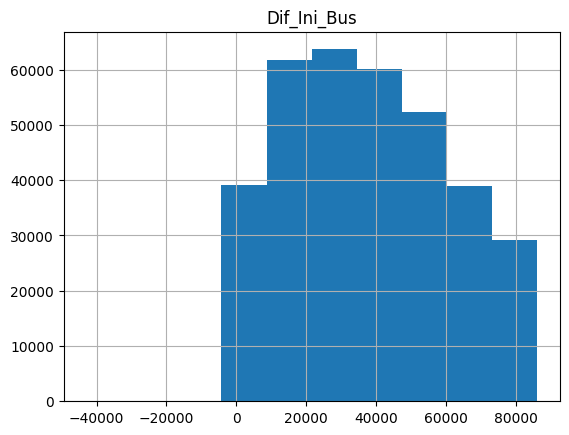

In [62]:
df_renfe5.hist("Dif_Ini_Bus")

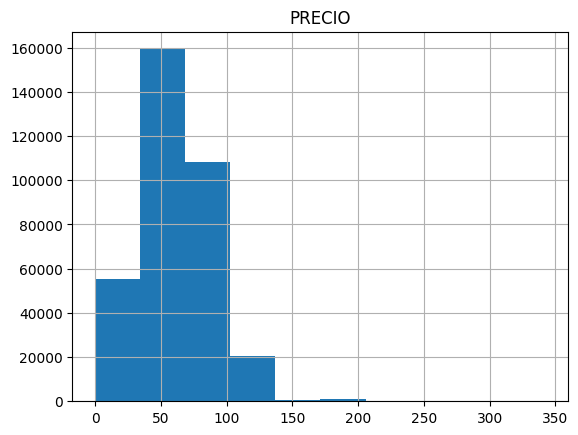

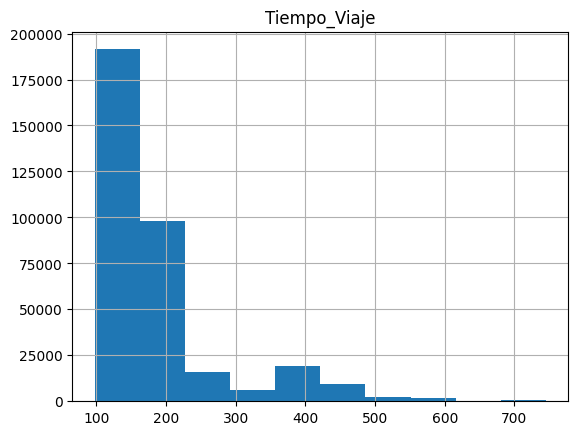

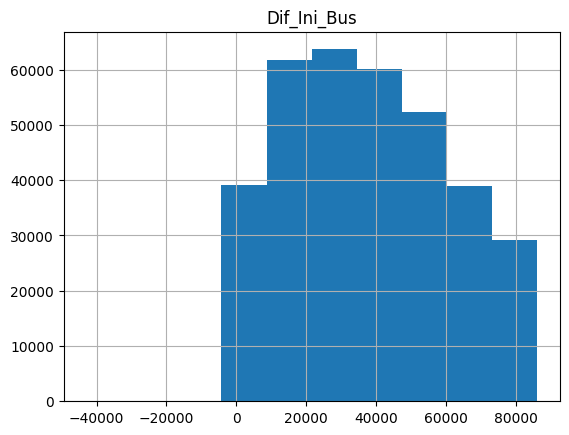

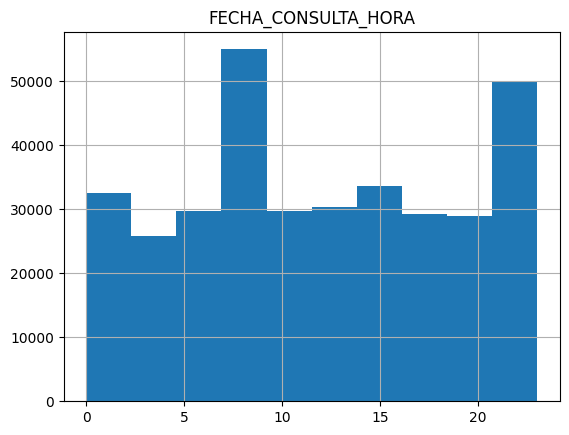

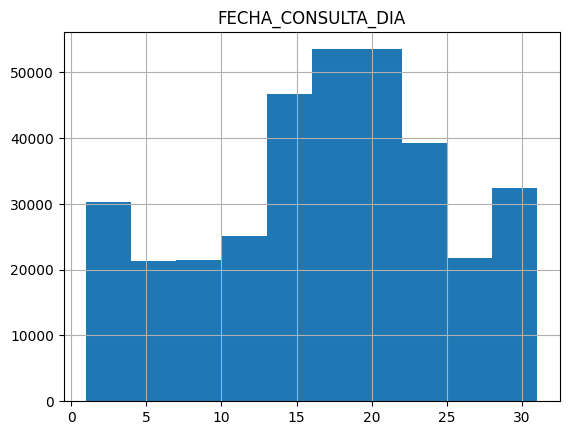

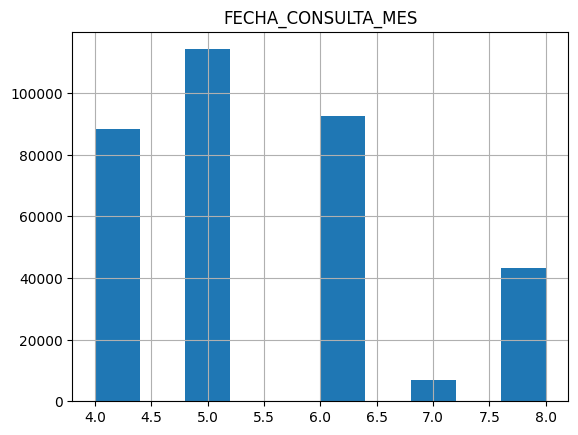

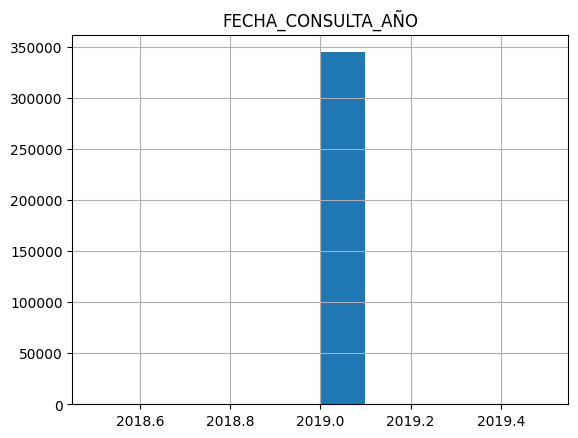

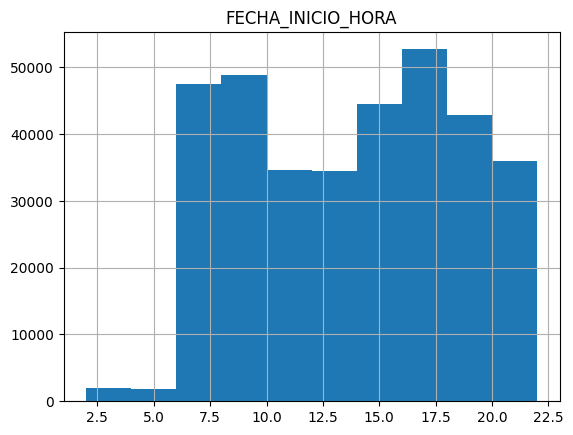

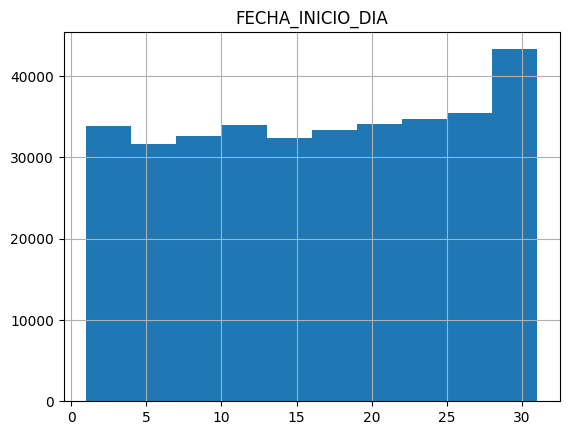

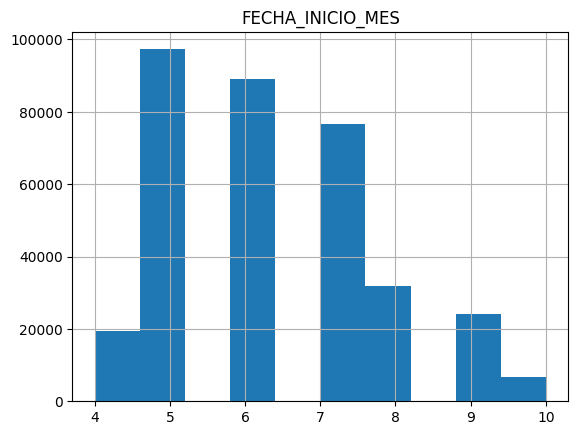

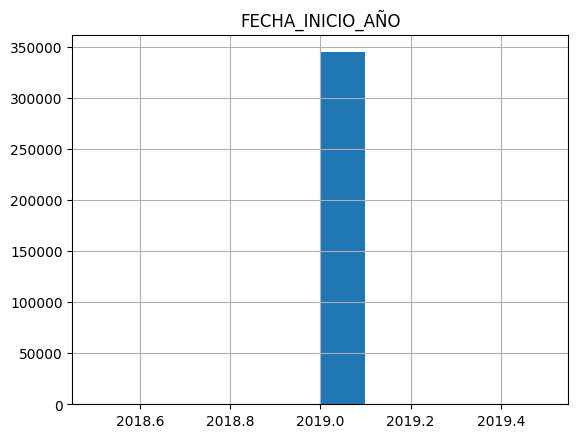

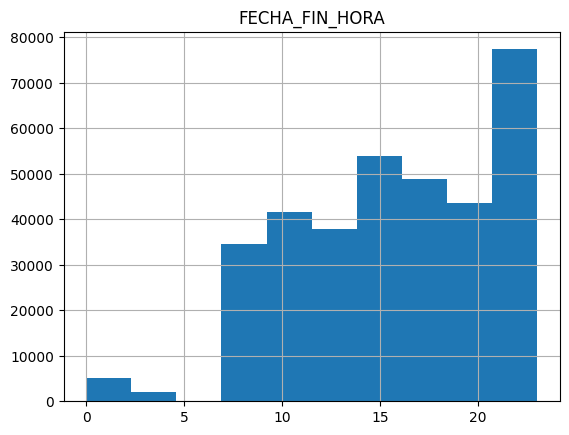

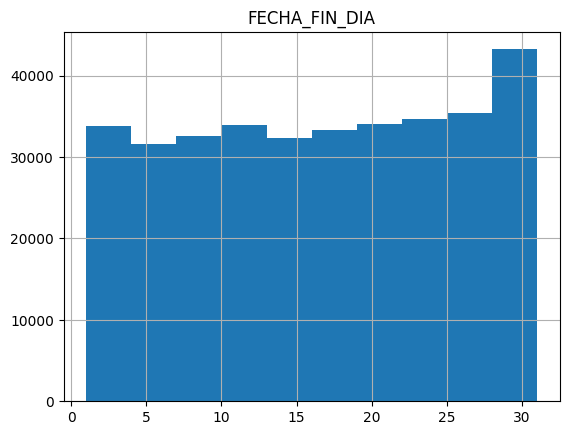

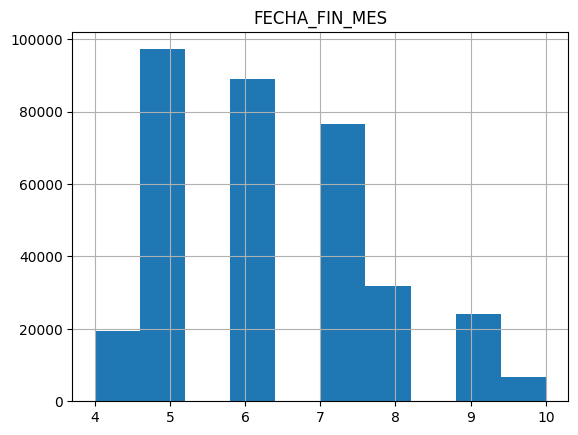

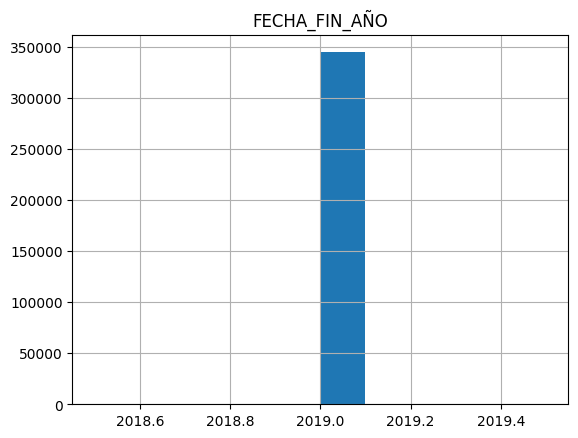

In [63]:
for i in df_renfe5.columns:
  try:
   df_renfe5.hist(i)
  except:
    pass



In [64]:
df_renfe5[df_renfe5["Dif_Ini_Bus"]<= 0]


,CIUDAD_ORIGEN,CIUDAD_DESTINO,TIPO_TREN,TIPO_TARIFA,CLASE,PRECIO,Tiempo_Viaje,Dif_Ini_Bus,FECHA_CONSULTA_HORA,FECHA_CONSULTA_NOMBREDIA,...,FECHA_INICIO_HORA,FECHA_INICIO_NOMBREDIA,FECHA_INICIO_DIA,FECHA_INICIO_MES,FECHA_INICIO_AÑO,FECHA_FIN_HORA,FECHA_FIN_NOMBREDIA,FECHA_FIN_DIA,FECHA_FIN_MES,FECHA_FIN_AÑO
792,MADRID,SEVILLA,ALVIA,Flexible,PreferenteSólo plaza H,87.40,153.0,-12537.950000,11,Wednesday,...,18,Monday,5,8,2019,21,Monday,5,8,2019
956,MADRID,SEVILLA,AVE,Promo,Turista Plus,72.30,160.0,-276.666667,1,Tuesday,...,20,Monday,27,5,2019,23,Monday,27,5,2019
1372,MADRID,SEVILLA,MD-LD,Flexible,Turista con enlace,45.80,461.0,-721.800000,1,Tuesday,...,13,Monday,10,6,2019,20,Monday,10,6,2019
1463,SEVILLA,MADRID,ALVIA,Flexible,Preferente,87.40,166.0,-932.683333,1,Friday,...,9,Thursday,23,5,2019,12,Thursday,23,5,2019
1944,MADRID,VALENCIA,AVE,Promo,SIN CLASE,51.15,113.0,-690.116667,1,Thursday,...,14,Wednesday,1,5,2019,16,Wednesday,1,5,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378290,SEVILLA,MADRID,AVE,Flexible,Turista,76.30,152.0,-508.516667,1,Friday,...,16,Thursday,16,5,2019,19,Thursday,16,5,2019
380920,PONFERRADA,MADRID,LD,Flexible,Turista con enlace,57.00,272.0,-503.900000,19,Wednesday,...,11,Wednesday,5,6,2019,16,Wednesday,5,6,2019
381103,SEVILLA,MADRID,AVE,Flexible,Turista,76.30,152.0,-401.266667,1,Saturday,...,18,Friday,26,4,2019,21,Friday,26,4,2019
381402,SEVILLA,MADRID,INTERCITY,Flexible,Turista,62.20,160.0,-366.083333,1,Thursday,...,19,Wednesday,19,6,2019,21,Wednesday,19,6,2019


In [65]:
df_renfe6= df_renfe5.copy()

In [66]:
df_renfe6.drop(df_renfe5[df_renfe6["Dif_Ini_Bus"]<= 0].index, inplace= True)

array([[<Axes: title={'center': 'Dif_Ini_Bus'}>]], dtype=object)

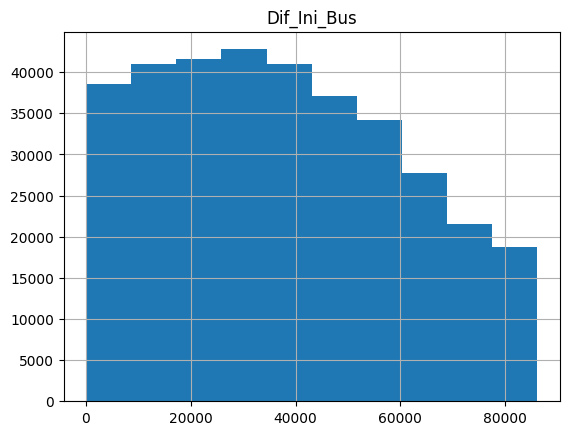

In [67]:
df_renfe6.hist("Dif_Ini_Bus")

In [68]:
df_renfe_clean=df_renfe6.copy()

In [69]:
#PREGUNTA 9

In [ ]:
#A

In [70]:
df_renfe_clean['FECHA_CONSULTA'] = pd.to_datetime(df_renfe_clean[['FECHA_CONSULTA_AÑO', 'FECHA_CONSULTA_MES', 'FECHA_CONSULTA_DIA']].rename(columns={'FECHA_CONSULTA_AÑO': 'year', 'FECHA_CONSULTA_MES': 'month', 'FECHA_CONSULTA_DIA': 'day'}))

fecha_minima = df_renfe_clean['FECHA_CONSULTA'].min()
fecha_maxima = df_renfe_clean['FECHA_CONSULTA'].max()


print("Fecha mínima:", fecha_minima)
print("Fecha máxima:", fecha_maxima)

Fecha mínima: 2019-04-11 00:00:00
Fecha máxima: 2019-08-22 00:00:00


In [ ]:
#B

In [78]:
precios1 = df_renfe_clean[df_renfe_clean['PRECIO'] > 0]


precio_minimo = precios1['PRECIO'].min()
precio_maximo = precios1['PRECIO'].max()
precio_promedio = precios1['PRECIO'].mean()


print("Precio mínimo del billete:", precio_minimo)
print("Precio máximo del billete:", precio_maximo)
print("Precio promedio del billete:", precio_promedio)

Precio mínimo del billete: 12.85
Precio máximo del billete: 342.8
Precio promedio del billete: 61.41680335770407


In [ ]:
#c

In [81]:
rutas_agosto= df_renfe_clean[(df_renfe_clean['FECHA_CONSULTA_MES'] == 8) &  (df_renfe_clean['FECHA_CONSULTA_AÑO'] == 2019)]

print("Número de rutas agosto de 2019:", len(rutas_agosto))

Número de rutas agosto de 2019: 42999


In [ ]:
#d

In [83]:
rutas_duracion= df_renfe_clean[df_renfe_clean['Tiempo_Viaje'] > 4]

print("rutas con duración superior a 4 horas:", len(rutas_duracion))

rutas con duración superior a 4 horas: 344404


In [ ]:
#e

In [86]:
simciudad = df_renfe_clean['CIUDAD_ORIGEN'].value_counts()

ciudadmin= simciudad.idxmin()
cantidadmin = simciudad.min()

print("Ciudad con menos simulaciones:", ciudadmin)
print("Cantidad de busquedas:", cantidadmin)

Ciudad con menos simulaciones: PONFERRADA
Cantidad de busquedas: 12364


In [ ]:
#f

In [96]:
clasebarata = df_renfe_clean.loc[df_renfe_clean['PRECIO'].idxmin(), 'CLASE']
clasecara = df_renfe_clean.loc[(df_renfe_clean['CLASE'] != 'SIN CLASE') & (df_renfe_clean['PRECIO']> 0),'CLASE'].max()


print("Clase más barata:", clasebarata)
print("Clase más cara:", clasecara)

Clase más barata: Turista
Clase más cara: TuristaSólo plaza H


In [ ]:
#g

In [104]:
tarifacara = df_renfe_clean[(df_renfe_clean['FECHA_INICIO_MES'] == 9) & (df_renfe_clean['FECHA_INICIO_AÑO'] == 2019) & (df_renfe_clean['TIPO_TARIFA'] != 'SIN TIPO') & (df_renfe_clean['PRECIO'] > 0)]['TIPO_TARIFA'].max()

print("La tarifa más cara en septiembre de 2019 es:", tarifacara)

La tarifa más cara en septiembre de 2019 es: Promo +


In [ ]:
#h

In [109]:
trenbarato = df_renfe_clean.groupby('TIPO_TREN')['PRECIO'].mean().idxmin()
preciotrenbarato = df_renfe_clean[df_renfe_clean['TIPO_TREN'] == trenbarato]['PRECIO'].mean()

print("tren más barato:", trenbarato)
print("precio promedio:", preciotrenbarato)

tren más barato: REGIONAL
precio promedio: 28.35000000000001


In [ ]:
#i

In [111]:
rutas_simuladas = len(df_renfe_clean[(df_renfe_clean['CIUDAD_ORIGEN'] == 'MADRID') & (df_renfe_clean['CIUDAD_DESTINO'] == 'BARCELONA')])

print("La cantidad de rutas simuladas entre MADRID y BARCELONA es:", rutas_simuladas)

La cantidad de rutas simuladas entre MADRID y BARCELONA es: 58915


In [ ]:
#j

In [113]:
import calendar

mesbarato = df_renfe_clean[(df_renfe_clean['CIUDAD_ORIGEN'] == 'BARCELONA') & (df_renfe_clean['CIUDAD_DESTINO'] == 'MADRID') & (df_renfe_clean['TIPO_TREN'] == 'AVE')].groupby('FECHA_INICIO_MES')['PRECIO'].mean().idxmin()
preciomasbarato = df_renfe_clean[(df_renfe_clean['CIUDAD_ORIGEN'] == 'BARCELONA') & (df_renfe_clean['CIUDAD_DESTINO'] == 'MADRID') & (df_renfe_clean['TIPO_TREN'] == 'AVE') & (df_renfe_clean['FECHA_INICIO_MES'] == mes_mas_barato)]['PRECIO'].mean()
nombremesbarato = calendar.month_name[mesbarato]


print("El mes más barato para viajar desde BARCELONA a MADRID en AVE :", nombremesbarato)
print("Su precio promedio es:", preciomasbarato)

El mes más barato para viajar desde BARCELONA a MADRID en AVE : August
Su precio promedio es: 77.08665366077578


In [ ]:
#k

In [115]:
preciomedio = df_renfe_clean[(df_renfe_clean['CIUDAD_ORIGEN'] == 'MADRID') & (df_renfe_clean['CIUDAD_DESTINO'] == 'VALENCIA') & (df_renfe_clean['FECHA_INICIO_MES'] == 8)]['PRECIO'].mean()

print("El precio promedio para viajar desde MADRID a VALENCIA en el mes de AGOSTO es:", preciomedio)

El precio promedio para viajar desde MADRID a VALENCIA en el mes de AGOSTO es: 37.91687669114805


In [116]:
df_final=df_renfe_clean.copy()

In [117]:
pd.to_pickle(df_final,"/content/drive/MyDrive/DATA SCIENCE/Clase1y2-Preprocessing/Clase1y2-Preprocessing/Project TrenMax/Project TrenMax/df_final_pk")